**Facebook Prophet Test**

In [71]:
import pandas as pd
from fbprophet import Prophet

In [72]:
# Random csv time series I found on GitHub
csv_url = 'https://raw.githubusercontent.com/PacktPublishing/Practical-Time-Series-Analysis/master/Data%20Files/wisconsin-employment-time-series.csv'
df = pd.read_csv(csv_url)

In [73]:
df.columns = ['ds', 'y'] # Prophet requires the columns to be names ds and y
df['ds'] = pd.to_datetime(df['ds']) # ds should be date or datetime

In [74]:
# We have to create a new Prophet object & fit it to the dataframe

m = Prophet()
m.fit(df)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
# Forecasting N years

years_to_forecast = 10

future = m.make_future_dataframe(periods=12 * years_to_forecast, freq='M')
forecast = m.predict(future)

In [76]:
forecast.tail() # yhat is the actual forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
293,1985-05-31,533.574608,458.597045,614.013451,455.442447,612.197388,2.274202,2.274202,2.274202,2.274202,2.274202,2.274202,0.0,0.0,0.0,535.848810
294,1985-06-30,534.746485,455.953753,613.984370,455.869001,614.471315,0.460050,0.460050,0.460050,0.460050,0.460050,0.460050,0.0,0.0,0.0,535.206535
295,1985-07-31,535.957425,457.033699,617.479877,456.363797,616.629231,0.740876,0.740876,0.740876,0.740876,0.740876,0.740876,0.0,0.0,0.0,536.698301
296,1985-08-31,537.168364,458.595310,620.232740,456.751287,618.475301,1.461149,1.461149,1.461149,1.461149,1.461149,1.461149,0.0,0.0,0.0,538.629513
297,1985-09-30,538.340241,460.158127,624.912818,456.954487,620.261821,3.683864,3.683864,3.683864,3.683864,3.683864,3.683864,0.0,0.0,0.0,542.024105


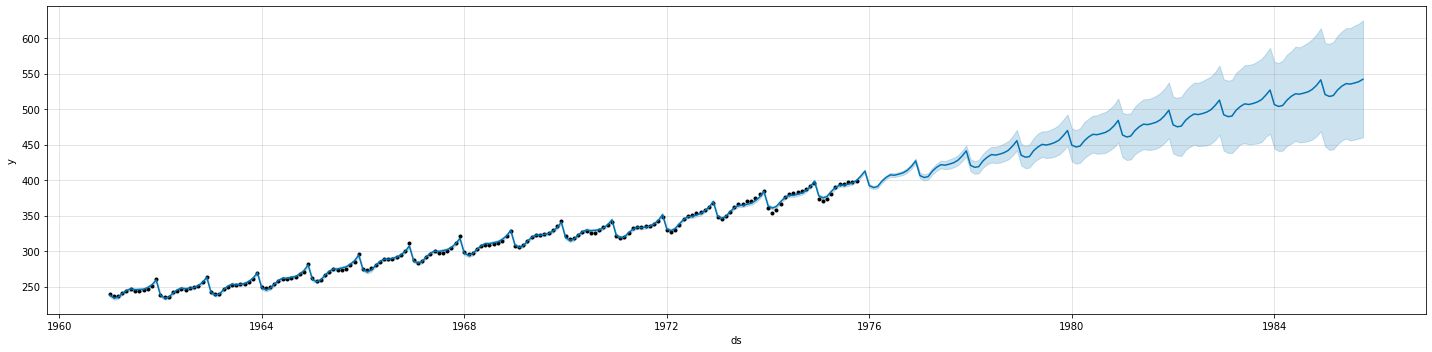

In [77]:
fig1 = m.plot(forecast, figsize = (20, 5))

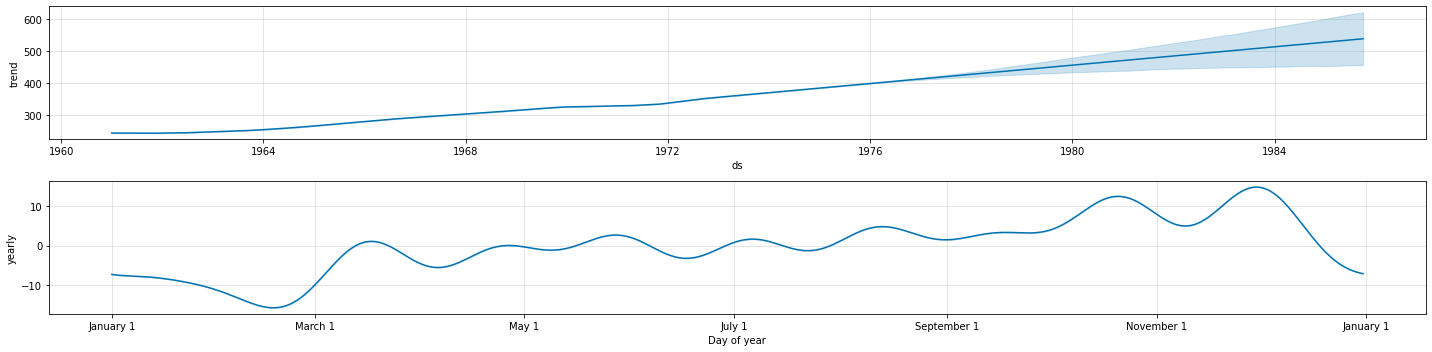

In [78]:
fig2 = m.plot_components(forecast, figsize = (20, 5))